In [307]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
import random
import pickle

img_dir = '../slides/images/'
pop_dir = '../pop_data/'

fname = '01l_100'
img_name = img_dir + fname + '.pdf'

In [308]:
sufix = ['', '_sel', '_cross', '_mut', '_cr_mut']
fnames = { fname+s : pop_dir+fname+s+'.dat' for s in sufix}
inames = { fname+s : img_dir+fname+s+'.pdf' for s in sufix}

fnames['10r_100'] = pop_dir+'10r_100.dat'
inames['10r_100'] = img_dir+'10r_100.pdf'

fnames['20r_100'] = pop_dir+'20r_100.dat'
inames['20r_100'] = img_dir+'20r_100.pdf'

fnames['30r_100'] = pop_dir+'30r_100.dat'
inames['30r_100'] = img_dir+'30r_100.pdf'

print fnames

{'30r_100': '../pop_data/30r_100.dat', '01l_100_mut': '../pop_data/01l_100_mut.dat', '01l_100_cr_mut': '../pop_data/01l_100_cr_mut.dat', '01l_100_sel': '../pop_data/01l_100_sel.dat', '20r_100': '../pop_data/20r_100.dat', '01l_100_cross': '../pop_data/01l_100_cross.dat', '10r_100': '../pop_data/10r_100.dat', '01l_100': '../pop_data/01l_100.dat'}


In [309]:
fit_dict = dict()
for key, value in fnames.iteritems():
    with open(value, 'r') as pic_file:
        fit_dict[key] = np.array([ch[0] for ch in pickle.load(pic_file)])
print '\n'.join([str((k,v)) for k,v in fnames.iteritems()])

('30r_100', '../pop_data/30r_100.dat')
('01l_100_mut', '../pop_data/01l_100_mut.dat')
('01l_100_cr_mut', '../pop_data/01l_100_cr_mut.dat')
('01l_100_sel', '../pop_data/01l_100_sel.dat')
('20r_100', '../pop_data/20r_100.dat')
('01l_100_cross', '../pop_data/01l_100_cross.dat')
('10r_100', '../pop_data/10r_100.dat')
('01l_100', '../pop_data/01l_100.dat')


In [310]:
fit_dict['30r_100']

array([ 12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82,  12026.82,  12026.82,
        12026.82,  12026.82,  12026.82,  12026.82, 

118.6862
1000
Saving at ../slides/images/01l_100_cr_mut_sel.pdf


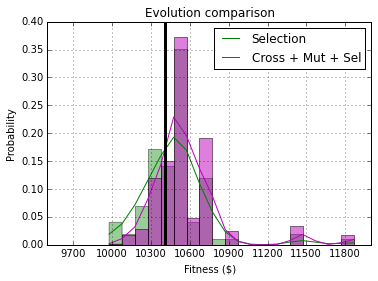

In [352]:
f = [0,1,0,0,0]
f += [0,0,0,1]
leg_label = []
legs = []
legs_aux = []

if f[0]:
    fitness = fit_dict[fname]/100.
    fitness = fitness[fitness!=0]
    y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='blue', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='blue', label='bla')
    legs_aux.append(aux)
    leg_label.append('1st gen')  

if f[1]:
    fitness = fit_dict[fname+'_sel']/100.
    y, bins, patches = plt.hist(fitness, bins='auto', normed=True, facecolor='green', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='green')
    legs_aux.append(aux)
    leg_label.append('Selection')

if f[2]:
    fitness = fit_dict[fname+'_cross']/100.
    y, bins, patches = plt.hist(fitness, bins=bins, normed=1, facecolor='red', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='red')
    legs_aux.append(aux)
    leg_label.append('Crossover')

if f[3]:
    fitness = fit_dict[fname+'_mut']/100.
    y, bins, patches = plt.hist(fitness, bins=bins, normed=True, facecolor='c', alpha=0.4)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='c')
    legs_aux.append(aux)
    leg_label.append('Mutation')
    
if f[4]:
    fitness = fit_dict[fname+'_cr_mut']/100.
    fitness = fit_dict[fname+'_cross']/100.
    y, bins, patches = plt.hist(fitness, bins=bins, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('Cross + Mut')
    
if f[5]:
    fitness = fit_dict['10r_100']/100.
    y, bins, patches = plt.hist(fitness, bins=20, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('10th gen')

if f[6]:
    fitness = fit_dict['20r_100']/100.
    y, bins, patches = plt.hist(fitness, bins=20, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('20th gen')
    
if f[7]:
    fitness = fit_dict['30r_100']/100.
    print max(fitness)
    y, bins, patches = plt.hist(fitness, bins=20, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('30th gen')

if f[8]:
    #with open(pop_dir+'01r_1000.dat', 'r') as pic_file:
    with open(pop_dir+'01l_100_cr_mut_sel.dat', 'r') as pic_file:
        fitness = np.array([ch[0] for ch in pickle.load(pic_file)]) / 100
    print max(fitness)
    #fitness = fitness[fitness != 0]
    print len(fitness)
    y, bins, patches = plt.hist(fitness, bins=bins, normed=True, facecolor='m', alpha=0.5)
    density = stats.gaussian_kde(fitness)
    aux, = plt.plot(bins,density(bins),'-', color='m')
    legs_aux.append(aux)
    leg_label.append('Cross + Mut + Sel')
    
for i in range(len(leg_label)):
    if i == 0:
        legs.append(legs_aux[0])
    else:
        legs.append(tuple([legs_aux[j] for j in range(i+1)]))
#print legs
    
plt.legend(legs, leg_label, loc=1)

plt.grid()
plt.title('Evolution comparison')
plt.ylabel('Probability')
plt.xlabel('Fitness ($)')

#bincenters = 0.5*(bins[1:]+bins[:-1])
#plt.plot(bincenters,y,'--')

#ticks = np.arange(84, 136, 8)
ticks = np.arange(97, 121, 3)
#ticks = np.arange(90, 116, 5)
#ticks = np.arange(0, 121, 20)
labels = [i*100 for i in ticks]
plt.xticks(ticks, labels)

plt.axvline(x=104.0829, color='black', linewidth=3)
axes = plt.gca()
#axes.set_xlim([80,120])
#axes.set_ylim([0,1])

plt.subplots_adjust(left=0.15)
#img_name = inames[fname+'_cr_mut']
img_name = img_dir + '01l_100_cr_mut_sel.pdf'
#img_name = img_dir + '01r_1000_sel.pdf'
print "Saving at", img_name
plt.savefig(img_name)
plt.show()

In [268]:
ticks = np.arange(0, 111, 20)
print ticks

[  0  20  40  60  80 100]
